In [ ]:
import os
import time
import pandas as pd
import re
import numpy as np
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
#from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn import svm
from nltk.corpus import stopwords

In [ ]:
!git clone -b master https://github.com/charles9n/bert-sklearn
!cd bert-sklearn; pip install .

Cloning into 'bert-sklearn'...
remote: Enumerating objects: 259, done.
remote: Total 259 (delta 0), reused 0 (delta 0), pack-reused 259
Receiving objects: 100% (259/259), 516.15 KiB | 5.73 MiB/s, done.
Resolving deltas: 100% (131/131), done.
Processing /content/bert-sklearn
     |████████████████████████████████| 133kB 12.2MB/s 
     |████████████████████████████████| 81kB 8.5MB/s 
     |████████████████████████████████| 7.7MB 21.9MB/s 
  Created wheel for bert-sklearn: filename=bert_sklearn-0.3.1-cp37-none-any.whl size=54248 sha256=a9b5bace160a7061eee01da4a118c93c8cdf8ae124c2b5dd1719f118d014b464
  Stored in directory: /root/.cache/pip/wheels/61/95/c6/5790aae8fb377f5ff356dbe58205aab28858595d6bff8197d0
Successfully built bert-sklearn
ERROR: botocore 1.20.106 has requirement urllib3<1.27,>=1.25.4, but you'll have urllib3 1.24.3 which is incompatible.


In [ ]:
#train = pd.read_csv("/content/drive/MyDrive/research/traindata.csv", encoding='utf8')
#dev = pd.read_csv("/content/drive/MyDrive/research/testdata.csv", encoding='utf8')
totaldf = pd.read_csv("/content/drive/MyDrive/research/totaldata.csv", encoding='utf8')

In [ ]:
#dev.head()

,Unnamed: 0,articleID,content,headline,label
0,2,3,নরসিংদীর মনোহরদীতে প্রেমের প্রস্তাবে রাজি না হ...,প্রেমের প্রস্তাবে রাজি না হওয়ায় স্কুলছাত্রীকে ...,1
1,23,24,"এশিয়া কাপের সবচেয়ে উত্তেজনাপূর্ণ ম্যাচ, মুখোমু...",ভারতের বিপক্ষে টস জিতে ব্যাটিং নিয়েছে পাকিস্তান,1
2,28,29,বাহরাইনকে ১০ গোলে হারানোর পর আরেকটি বড় জয় পেল ...,এএফসি কিশোরী ফুটবল : লেবাননকে ৮ গোলে উড়িয়ে দিল...,1
3,37,38,কাম্প নউয়ে মঙ্গলবার স্থানীয় সময় বিকালে ইউরোপ স...,মেসির হ্যাটট্রিকে বার্সার চমৎকার শুরু,1
4,93,95,প্রথম ও দ্বিতীয় শ্রেণির সরকারি চাকরি থেকে কোটা...,প্রভাব পর্যালোচনার সুপারিশ কমিটির,1


In [ ]:
totaldf.drop(['Unnamed: 0', 'articleID'], axis=1)

,content,headline,label
0,গত ১৭ সেপ্টেম্বর বাংলাদেশ কৃষি বিশ্ববিদ্যালয়ে ...,"হট্টগোল করায় বাকৃবিতে দুইজন বরখাস্ত, ৬ জনকে শোকজ",1
1,বাংলাদেশের বৃহৎ শ্রমবাজার মালয়েশিয়ায় আবার শ্রম...,মালয়েশিয়ায় কর্মী পাঠানোর ব্যবস্থা নেয়ার সুপারিশ,1
2,নরসিংদীর মনোহরদীতে প্রেমের প্রস্তাবে রাজি না হ...,প্রেমের প্রস্তাবে রাজি না হওয়ায় স্কুলছাত্রীকে ...,1
3,সুপ্রিম কোর্টের হাইকোর্ট বিভাগের বিচারপতি আহমে...,মেডিয়েশনই মামলাজট নিরসনের পথ : বিচারপতি আহমেদ ...,1
4,মাদারীপুর সদরের উপজেলার লেকেরপাড়ে একটি বেসরকার...,টকশোতে বক্তব্য দিতে গিয়ে জাপা নেতার মৃত্যু,1
...,...,...,...
11429,এটিকে আর্মি অব ইসলাম বা ‘ইসলামি আর্মি’ নামে অভ...,৫৭টি মুসলিম দেশকে নিয়ে ইসলামি সেনাবাহিনী গঠন,0
11430,বিশ্ব মুসলিমদের প্রধান শত্রু ইহুদিবাদী সন্ত্রা...,ইসরাইল প্রতিরোধে আসছে এরদোগানের ‘ইসলামিক আর্মি’,0
11431,ইসলামী মূল্যবোধের উন্নয়ন এবং ইসলামী সংস্কৃতি ব...,৫৬০ মডেল মসজিদ নির্মাণ করবে সরকার,0
11432,ভারতের বিনোদন জগতে গত কয়েক দিন সবচেয়ে উচ্চারিত...,রানুকে বাড়ি উপহার দিলেন সালমান,0


In [ ]:
#dev.drop(['Unnamed: 0', 'articleID'], axis=1)
#train.drop(['Unnamed: 0', 'articleID'], axis=1)

,content,headline,label
0,‘লাভরাত্রি’ সিনেমার নাম দিয়ে ধর্মীয় অনুভূতিতে...,‘লাভরাত্রি’ বিতর্কে সালমানের বিরুদ্ধে মামলা দায়ের,1
1,"নিজস্ব সংবাদদাতা, নওগাঁ ॥ নওগাঁয় প্রেমের ফাঁদে...",নওগাঁয় প্রেমের ফাঁদে ফেলে অর্থ আদায় চক্রের ৮ য...,1
2,আন্তর্জাতিক ডেস্ক আরটিএনএন বার্লিন: ‘শীর্ষ অপর...,জি-২০ দাঙ্গাবাজদের ধরতে ইউরোপ জুড়ে অভিযান,1
3,গোপালগঞ্জে জমি নিয়ে বিরোধের জেরে শুক্রবার (২১ ...,গোপালগঞ্জে দুই পক্ষের সংঘর্ষে আহত ২৫,1
4,"ইমাম হোসাইন (রা.), নামটি বড়ই সুন্দর, কারণ হোস...",কারবালার শিক্ষা,1
...,...,...,...
7999,বাস্তুসাস্ত্র মতে আমাদের বাড়ির চার দেওয়ালের অ...,বাড়িতে যদি এই ৭টি জিনিস থাকে তাহলে আপনার মারা...,0
8000,চলচ্চিত্র পরিচালক রফিক শিকদারের মা রওশন আরার শ...,রোগীর শরীর থেকে কিডনি গায়েবের ঘটনায় দুটি কমিটি,1
8001,ভারতের বিপক্ষে বাংলাদেশ দলের ব্যাটসম্যানরা ব্য...,পঞ্চাশ রানের জুটি গড়ে সাজঘরে মাশরাফি-মিরাজ,1
8002,অবশেষে আলোর মুখ দেখতে যাচ্ছে হযরত শাহজালাল (রহ...,সব বাধা কাটল থার্ড টার্মিনালের,1


In [ ]:
#train['total'] = train['headline']+train['content']
#dev['total'] = dev['headline'] + dev['content']

In [ ]:
totaldf['final_text'] = totaldf['headline'] + totaldf['content']

In [ ]:
!pip install bnltk

In [ ]:
from bnltk.stemmer import BanglaStemmer
stemmer = BanglaStemmer()
stopWords = []
with open('/content/drive/MyDrive/research/bengali', 'r', encoding="utf8") as f:
    for row in f:  # iterate over the rows in the file
        row = row.replace("\n", "")
        stopWords.append(row)

In [ ]:
#stemmed_text = []
#final_text_result = []
#for text in totaldf['final_text']:
#    result = re.sub(r'[\u09E6-\u09EF]', ' ', text)
#    result = result.split()
#    result = [r for r in result if r not in set(stopWords)]
#    stemmed_result = [stemmer.stem(r) for r in result]
#    stemmed_text.append(" ".join(stemmed_result))

In [ ]:
print(len(stemmed_text))
totaldata = totaldf.final_text

11434


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(totaldata, totaldf['label'], test_size = 0.3, random_state= 0)

In [ ]:
#X_train = train['total']
#y_train = train['label']

# use the dev set for testing
#test = dev
#X_test = test['total']
#y_test = test['label']

In [ ]:
from bert_sklearn import BertClassifier
from bert_sklearn import BertRegressor
from bert_sklearn import load_model
bertmodel = BertClassifier(bert_model='bert-base-multilingual-uncased', bert_vocab='/content/drive/MyDrive/research/vocab.txt', max_seq_length=64, train_batch_size=16)

Building sklearn text classifier...


In [ ]:
bertmodel

BertClassifier(bert_config_json=None,
               bert_model='bert-base-multilingual-uncased',
               bert_vocab='/content/drive/MyDrive/research/vocab.txt',
               do_lower_case=None, epochs=3, eval_batch_size=8, fp16=False,
               from_tf=False, gradient_accumulation_steps=1, ignore_label=None,
               label_list=None, learning_rate=2e-05, local_rank=-1,
               logfile='bert_sklearn.log', loss_scale=0, max_seq_length=64,
               num_mlp_hiddens=500, num_mlp_layers=0, random_state=42,
               restore_file=None, train_batch_size=16, use_cuda=True,
               validation_fraction=0.1, warmup_proportion=0.1)

In [ ]:
bertmodel.fit(X_train, y_train)
pred = bertmodel.predict(X_test)

Loading bert-base-multilingual-uncased model...
Defaulting to linear classifier/regressor
Loading Pytorch checkpoint

train data size: 7203, validation data size: 800



/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))




Epoch 1, Train loss: 0.3584, Val loss: 0.2303, Val accy: 91.88%





Epoch 2, Train loss: 0.2044, Val loss: 0.1635, Val accy: 93.88%





Epoch 3, Train loss: 0.1251, Val loss: 0.1767, Val accy: 94.12%



In [ ]:
acc = bertmodel.score(X_test, y_test)
print(acc)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))




Loss: 0.2133, Accuracy: 93.35%
93.35470708248324


In [ ]:
print("Accuracy:", metrics.accuracy_score(y_test, pred))
bert_acc = round((100 * metrics.accuracy_score(y_test, pred)), 2)
print("Precision:", metrics.precision_score(y_test, pred))
print("Recall:", metrics.recall_score(y_test, pred))
print("F1-Score:", metrics.f1_score(y_test, pred))
print("Confusion Matrix:", metrics.confusion_matrix(y_test, pred))

Accuracy: 0.9335470708248325
Precision: 0.944710770214126
Recall: 0.9817336433078712
F1-Score: 0.9628664495114007
Confusion Matrix: [[ 247  173]
 [  55 2956]]


In [ ]:
#save model to disk
savefile = '/content/drive/MyDrive/research/bertmodel.bin'
bertmodel.save(savefile)

# load model from disk
#new_model = load_model(savefile)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


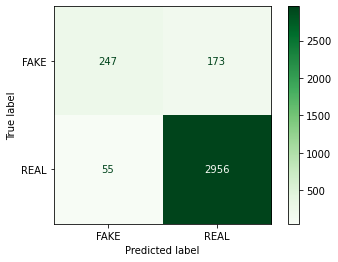

In [ ]:
plot_confusion_matrix(bertmodel, X_test, y_test, display_labels=['FAKE', 'REAL'], cmap='Greens', values_format="d")

In [ ]:
#banglabert
bertmodelcased = BertClassifier(bert_model='bert-base-multilingual-cased', bert_vocab='/content/drive/MyDrive/research/vocab.txt', max_seq_length=64, train_batch_size=16)

Building sklearn text classifier...


Loading bert-base-multilingual-uncased model...
Defaulting to linear classifier/regressor
Loading Pytorch checkpoint

train data size: 7204, validation data size: 800



/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))




Epoch 1, Train loss: 0.3753, Val loss: 0.2888, Val accy: 88.75%





Epoch 2, Train loss: 0.2265, Val loss: 0.2120, Val accy: 91.62%





Epoch 3, Train loss: 0.1422, Val loss: 0.2170, Val accy: 93.25%




Accuracy: 0.9646767926527728
Precision: 0.9807621161672216
Recall: 0.9822156354205261
F1-Score: 0.9814883376527213
Confusion Matrix: [[  80   52]
 [  48 2651]]


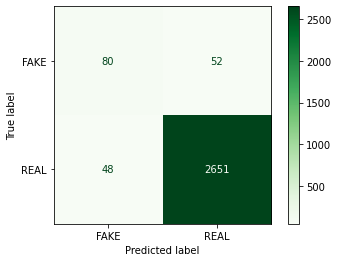

In [ ]:
bertmodel.fit(X_train, y_train)
pred = bertmodel.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, pred))
bert_acc = round((100 * metrics.accuracy_score(y_test, pred)), 2)
print("Precision:", metrics.precision_score(y_test, pred))
print("Recall:", metrics.recall_score(y_test, pred))
print("F1-Score:", metrics.f1_score(y_test, pred))
print("Confusion Matrix:", metrics.confusion_matrix(y_test, pred))
plot_confusion_matrix(bertmodel, X_test, y_test, display_labels=['FAKE', 'REAL'], cmap='Greens', values_format="d")